<a href="https://colab.research.google.com/github/danihga/Jovia/blob/main/Clusteirng_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the association between the questions answered

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

/var/folders/g3/ncfg5yhn47v7z7k0wmn723zc0000gn/T/ipykernel_2134/216586363.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Import Data

data = pd.read_excel(r'/Users/familiadelasherasgarciahijosdanielnuriapablo/Documents/Applied Math and Data Science/Jovia/DeidentifiedSDOHPatientData-v1.xlsx')

data.sample(6)

# Drop id, age, race, ethnicity, gender
data.drop(columns = ['PatIdentifier','AgeAtAdmit', 'Race', 'Ethnicity', 'Gender'], inplace = True)

questions  = list(data.columns)

data.columns = [f'Q{i+1}' for i in range(len(list(data.columns)))]

questions_dict = dict(zip(data.columns, questions))

data.sample(6)


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
13059,Never True,Never True,No,No,No,No,No,No
13672,Sometimes True,Sometimes True,Yes,No,Yes,Yes,No,No
3234,Never True,Never True,NaN,NaN,NaN,NaN,NaN,NaN
4244,Never True,Never True,No,No,No,No,No,No
12188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(15843, 8)

In [4]:
data.isnull().sum()/15843

Q1    0.296598
Q2    0.297166
Q3    0.436660
Q4    0.437102
Q5    0.457552
Q6    0.457931
Q7    0.437796
Q8    0.734267
dtype: float64

In [5]:
for i in data.columns:
    data[i] = data[i].map({'Never True':1, 'Patient unable to answer':0, 'Patient declined':0,
       'Sometimes True':1, 'Often True':2, 'No':1, 'Yes':2, 'Already Shut Off':2 })

In [6]:
data.fillna(0, inplace = True)

## Label Encoding Approach

**Proportions of the answers to the questions and Encode Questions**

In [7]:
data['Q1'].value_counts(normalize=True, dropna=False)#.cumsum()


Q1
1.0    0.649498
0.0    0.347598
2.0    0.002903
Name: proportion, dtype: float64

In [8]:
data['Q2'].value_counts(normalize=True,dropna=False)#.cumsum()

Q2
1.0    0.649056
0.0    0.347977
2.0    0.002967
Name: proportion, dtype: float64

In [9]:
data['Q3'].value_counts(normalize=True,dropna=False)#.cumsum()

Q3
1.0    0.500978
0.0    0.490311
2.0    0.008710
Name: proportion, dtype: float64

In [10]:
data['Q4'].value_counts(normalize=True,dropna=False)#.cumsum()

Q4
1.0    0.501988
0.0    0.490437
2.0    0.007574
Name: proportion, dtype: float64

In [11]:
data['Q5'].value_counts(normalize=True,dropna=False)#.cumsum()

Q5
1.0    0.498769
0.0    0.491700
2.0    0.009531
Name: proportion, dtype: float64

In [12]:
data['Q6'].value_counts(normalize=True,dropna=False)#.cumsum()

Q6
1.0    0.501736
0.0    0.491447
2.0    0.006817
Name: proportion, dtype: float64

In [13]:
data['Q7'].value_counts(normalize=True,dropna=False)#.cumsum()

Q7
1.0    0.502556
0.0    0.491321
2.0    0.006123
Name: proportion, dtype: float64

In [14]:
data['Q8'].value_counts(normalize=True,dropna=False)#.cumsum()

Q8
0.0    0.755349
1.0    0.240169
2.0    0.004481
Name: proportion, dtype: float64

In [15]:
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
15838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15839,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
15840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15841,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


## Clustering

### PCA

In [16]:
#pip install yellowbrick

In [17]:
# Elbow method to determine the appropiate number of clusters
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import mplcursors

Elbow Method to determine the number of clusters to be formed:


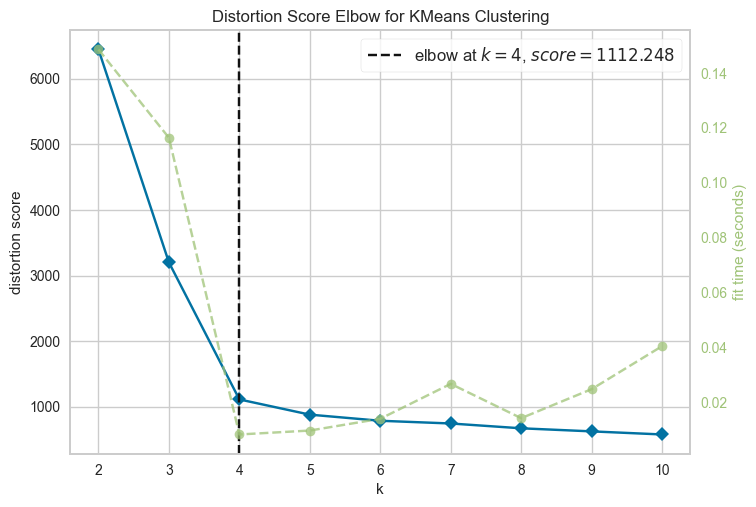

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data)
Elbow_M.show()

In [19]:
#pip install mplcursors

In [62]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

def do_clustering(data: pd.DataFrame, method: str = 'KMeans', **kwargs)->pd.Series:
    
    d_frame = data.copy()

    algorithms = {
        'KMeans': KMeans,
        'AgglomerativeClustering': AgglomerativeClustering,
        'DBSCAN': DBSCAN
        # Add more clustering algorithms as needed
    }

    if method in algorithms:
        # Create the clustering algorithm object with specified parameters
        algorithm = algorithms[method](**kwargs)
        # Fit the algorithm to the data
        algorithm.fit(data)
        # Return the labels or clustering results
        if method == 'DBSCAN':
            return algorithm.labels_
        else:
            return algorithm.labels_.tolist()  # Convert labels to list for compatibility
    else:
        raise ValueError(f"Unsupported clustering algorithm: {method}")



In [66]:
ac_labels = do_clustering(data, method = 'AgglomerativeClustering', n_clusters = 4)
pd.Series(ac_labels).value_counts(normalize = True)

3    0.343180
1    0.263902
0    0.247680
2    0.145238
Name: proportion, dtype: float64

In [26]:
km_labels = do_kmeans(data, clusters = 4, method = 'KMeans')
pd.Series(km_labels).value_counts(normalize = True)

1    0.344758
2    0.266237
0    0.243010
3    0.145995
Name: proportion, dtype: float64

In [52]:
def cluster_analysis(data: pd.DataFrame):
    # Create a 2x2 grid of figures for each label
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Create boxplot for each label
    for label in range(4):  # Assuming labels are 0, 1, 2, 3
        # Filter the data for the current label
        df_label = data[data['Labels'] == label]
        
        # Create boxplot for each column in the current label on the corresponding axis
        sns.boxplot(data=df_label.drop(columns='Labels'), ax=axes[label])
        
        # Set labels and title
        axes[label].set_xlabel('Columns (Q1-Q8)')
        axes[label].set_ylabel('Values')
        axes[label].set_title(f'Boxplot for Cluster {label}')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

**Analysis of Clusters KMeans**

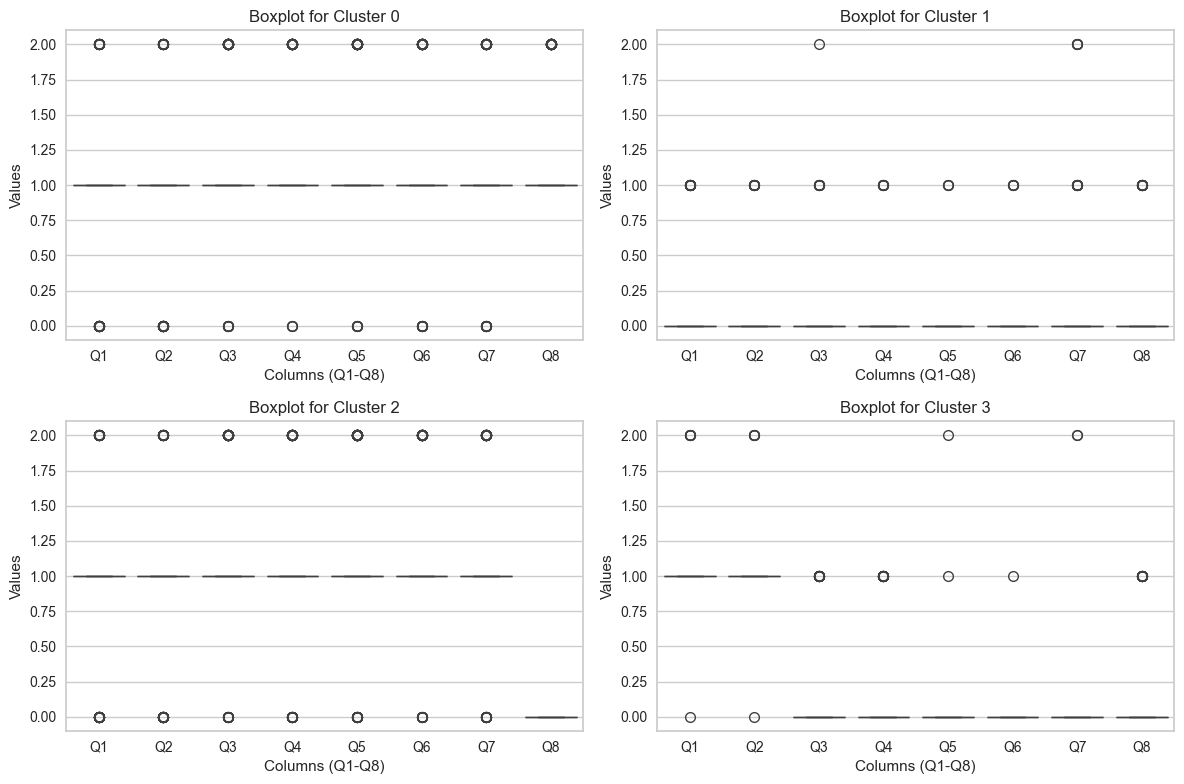

In [53]:
km_data = data.copy()

km_data['Labels'] = km_labels

cluster_analysis(km_data)

In [54]:
71/3850

0.018441558441558443

**Agglomerative Clustering**